In [1]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
#chunks = pd.read_json('data/review.json', lines=True, chunksize = 10000)

In [3]:
#for c in chunks:
#    chunk = c
#    break

In [4]:
#chunk

In [5]:
#This line of code in the terminal, randomly samples the json file and makes a new json file
#cat review.json | awk 'BEGIN {srand()} !/^$/ { if (rand() <= .05) print $0}' > sample_review.json

In [96]:
data = pd.read_json('data/sample_review.json', lines=True)

In [97]:
data.drop(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool', 'date'], axis=1, inplace=True)

In [98]:
data

,stars,text
0,1,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
1,5,Maria is VERY good at what she does with great...
2,4,Paid a visit here after the JT concert on Frid...
3,5,"I went for the second time yesterday, and it d..."
4,5,I normally don't bother with dealing health st...
...,...,...
402224,5,Katherine is a great piano teacher! She is so ...
402225,1,"Never in my life, of 62 years, have I ever tas..."
402226,1,This restaurant was dirty and in complete disa...
402227,5,"This salon is very clean, professional and upb..."


In [100]:
rows, cols = data.shape

In [102]:
sentiment = []
for row in range(rows):
    rating = data.loc[row, 'stars']
    if rating < 3:
        sentiment.append(-1)
    elif rating == 3:
        sentiment.append(0)
    else:
        sentiment.append(1)

In [103]:
data['sentiment'] = sentiment

In [104]:
data

,stars,text,sentiment
0,1,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",-1
1,5,Maria is VERY good at what she does with great...,1
2,4,Paid a visit here after the JT concert on Frid...,1
3,5,"I went for the second time yesterday, and it d...",1
4,5,I normally don't bother with dealing health st...,1
...,...,...,...
402224,5,Katherine is a great piano teacher! She is so ...,1
402225,1,"Never in my life, of 62 years, have I ever tas...",-1
402226,1,This restaurant was dirty and in complete disa...,-1
402227,5,"This salon is very clean, professional and upb...",1


In [123]:
data['sentiment'].describe()

count    402229.000000
mean          0.417494
std           0.849063
min          -1.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: sentiment, dtype: float64

In [105]:
y = data['sentiment']

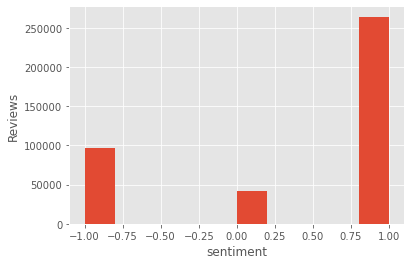

In [106]:
plt.hist(y)
plt.ylabel('Reviews')
plt.xlabel('sentiment')
plt.show()

In [11]:
corpus = data['text'].tolist()

In [1]:
vectorizer = TfidfVectorizer(strip_accents='ascii', stop_words='english',ngram_range=(1,2), min_df=.01)

NameError: name 'TfidfVectorizer' is not defined

In [125]:
X = vectorizer.fit_transform(corpus)

In [126]:
X

<402229x6352094 sparse matrix of type '<class 'numpy.float64'>'
	with 35794019 stored elements in Compressed Sparse Row format>

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
rf = RandomForestClassifier(n_jobs=-1)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)

In [ ]:
rfpred = rf.predict(X_test)

In [ ]:
residual = rfpred - y_test

In [ ]:
plt.scatter(y_test, residual)
plt.ylabel('Predicted - Acutal')
plt.xlabel('Score')

In [ ]:
plt.scatter(rfpred, residual)

In [ ]:
imp = rf.feature_importances_

In [ ]:
bow = vectorizer.get_feature_names()

In [ ]:
#bag of words from most important feature to least
bws = []
for word in imp.argsort()[::-1]:
    bws.append(bow[word])

In [ ]:
bws

In [ ]:
len(bws)

In [ ]:
importances =rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
categories=['-1','0', '1']
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', xticklabels=categories, yticklabels=categories, ax=ax,cmap="YlGnBu")
ax.set_title('Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted',fontsize=15)
ax.set_ylabel('Actual',fontsize=15)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.savefig('rap_r&_heatmap.png')